Training dataset Score: 0.883197840979863
Testing dataset Score: 0.9909168388429752
Mean Absolute Error: 16250.0
Root Mean Squared Error of train dataset: 101634.8626825461
Root Mean Squared Error of test: 20967.236346261754
[164100.]


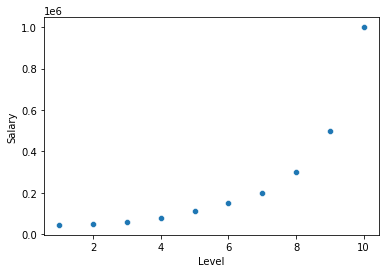

In [1]:
#importing all the libraries needed for the process
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#reading the csv data using pandas to salary
salary=pd.read_csv("datasets/rand-forest-position-salaries.csv")

#Using the scatterplot to find the relation between level and salary
sns.scatterplot(data=salary,x='Level',y='Salary')

# There is a polynomial relation between the variables that is if the level increase the salary also increases
# The Salary is independent variable and the level is dependent variable

#Now dividing the X and Y based on the variables.
X=salary.iloc[:,1].values
Y=salary.iloc[:,-1].values

#importing the train_test_split method from sklearn
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,
                                               random_state=0)

#reshaping the train and test dataset to minimize the value error in the further process.

X_train=np.array(X_train).reshape(-1, 1)
Y_train=np.array(Y_train).reshape(-1, 1)
X_test=np.array(X_test).reshape(-1, 1)
Y_test=np.array(Y_test).reshape(-1, 1)

#importing the Random tree regressor form the sklearn.ensemble
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=100,random_state=1)
rfr.fit(X_train,Y_train.ravel())

print("Training dataset Score:",rfr.score(X_train,Y_train))
print("Testing dataset Score:",rfr.score(X_test,Y_test))

#Predicting the values
x_pred=rfr.predict(X_train)
y_pred=rfr.predict(X_test)

from sklearn import metrics
print('Mean Absolute Error:', 
            metrics.mean_absolute_error(Y_test, y_pred))

print('Root Mean Squared Error of train dataset:', 
            np.sqrt(metrics.mean_squared_error(Y_train, x_pred)))

print('Root Mean Squared Error of test:', 
            np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

#Now predicting if he is being honest about his last salary by predicting the sal for the level 6.5
new_val= np.array(6.5).reshape(-1,1)
our_pred=rfr.predict(new_val)

print(our_pred)